# **Machine Learning from Data**

## Lab 6: Support Vector Machines

2021 - Veronica Vilaplana - [GPI @ IDEAI](https://imatge.upc.edu/web/) Research group

-----------------

In [ ]:
import numpy as np
from numpy.linalg import pinv
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit, StratifiedShuffleSplit
from sklearn.svm import SVC
import pandas as pd

## Part1: Toy examples
Before working on our real dataset, we will "play" with synthetic datasets to see the differences between the linear, polynomic and gaussian SVM models and the hyper-parameters.

Scikit-learn offers utility functions to create blobs and classification datasets. To be able to easily visualize the data and decision function, we will create datasets with 2 classes and 2 variables.

###A linearly separable dataset

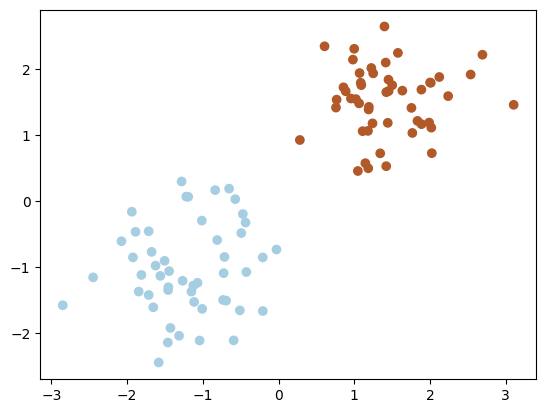

In [ ]:
from sklearn import datasets
centers = [[-1.1,-1], [1.5, 1.5]]
X, y = datasets.make_blobs(n_samples=100, centers=centers, n_features=2,random_state=3,cluster_std=0.6)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired);
plt.show()

We will use this function to plot SVM decision regions and support vectors

In [ ]:
def plot_decision_regions(clf, X, y, ax):
    """Plot SVM decision regions."""

    # Plot boundary and margin if linear kernel.
    if clf.kernel == "linear":
        # get the separating hyperplane
        w = clf.coef_[0]
        a = -w[0] / w[1]

        xx = np.linspace(-3.5, 3.5)
        yy = a * xx - (clf.intercept_[0]) / w[1]

        # plot the parallels to the separating hyperplane that pass through the
        # support vectors (margin away from hyperplane in direction
        # perpendicular to hyperplane). This is sqrt(1+a^2) away vertically in 2-d.
        margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
        yy_down = yy - np.sqrt(1 + a ** 2) * margin
        yy_up = yy + np.sqrt(1 + a ** 2) * margin

        # plot the line, the points, and the nearest vectors to the plane
        ax.plot(xx, yy, 'k-')
        ax.plot(xx, yy_down, 'k--')
        ax.plot(xx, yy_up, 'k--')

    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
               facecolors='none', zorder=10, edgecolors='k')
    ax.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired,
               edgecolors='k')

    x_min = -3.5
    x_max = 3.5
    y_min = -3.5
    y_max = 3.5


    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.predict(np.c_[XX.ravel(), YY.ravel()])
    Z = Z.reshape(XX.shape)

    # Plot empirical decision boundary if not linear.
    if clf.kernel != "linear":
        ax.contour(XX, YY, Z, colors=['k'], linestyles=['-'], levels=[0])

    # Put the result into a color plot
    ax.pcolormesh(XX, YY, Z, cmap=plt.cm.Paired)

    # Set title
    ax.set_title("SVM kernel='{}', C={}, gamma={}\naccuracy={}".format(
        clf.kernel, clf.C, clf.gamma, clf.score(X, y)))

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())


### Linear SVM
We fit a linear SVM and show the margin, decision boundary and support vectors.
First we do not regularize (using a large value of the hyperparameter C ('P' in the Lectures).

You can try smaller values of C (smaller than 1) and see how the decision boundary, margins and support vectors change.

Based on: [source](https://scikit-learn.org/stable/auto_examples/svm/plot_svm_margin.html).

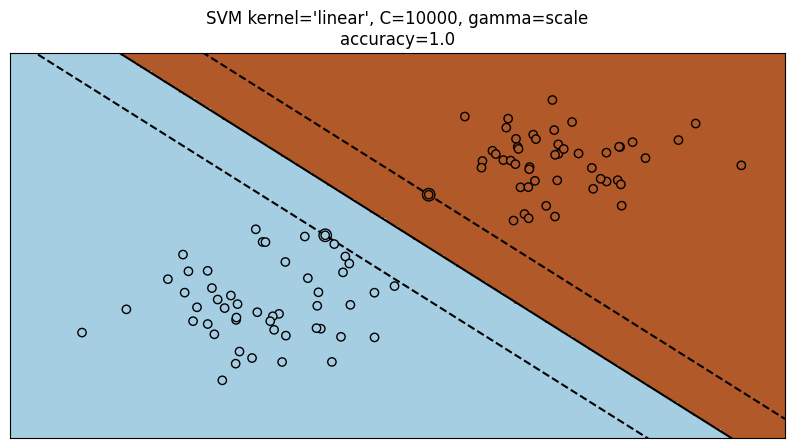

In [ ]:
fig, ax1 =plt.subplots(1,figsize=(10, 5))

# Fit with C=10000 (very high, do not regularize).
clf_C1 = SVC(kernel="linear",C=10000)
clf_C1.fit(X, y)

# Plot decision boundaries.
plot_decision_regions(clf_C1, X, y, ax1)

###A non-separable dataset

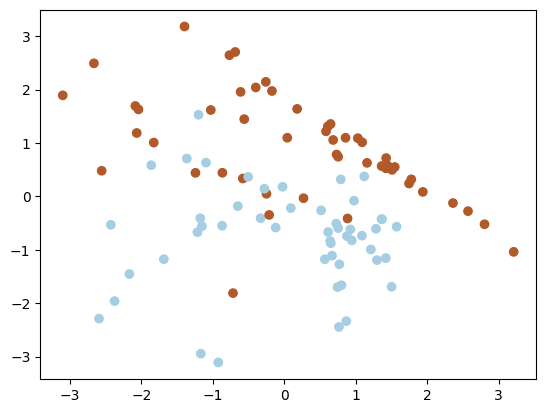

In [ ]:
from sklearn.datasets import make_classification
X, y = make_classification(n_features=2, n_informative=2, n_redundant=0, random_state=3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired);

### Linear SVM
First, we will fit a linear SVM and illustrate the effect the parameter C.

Based on: [source](https://scikit-learn.org/stable/auto_examples/svm/plot_svm_margin.html).

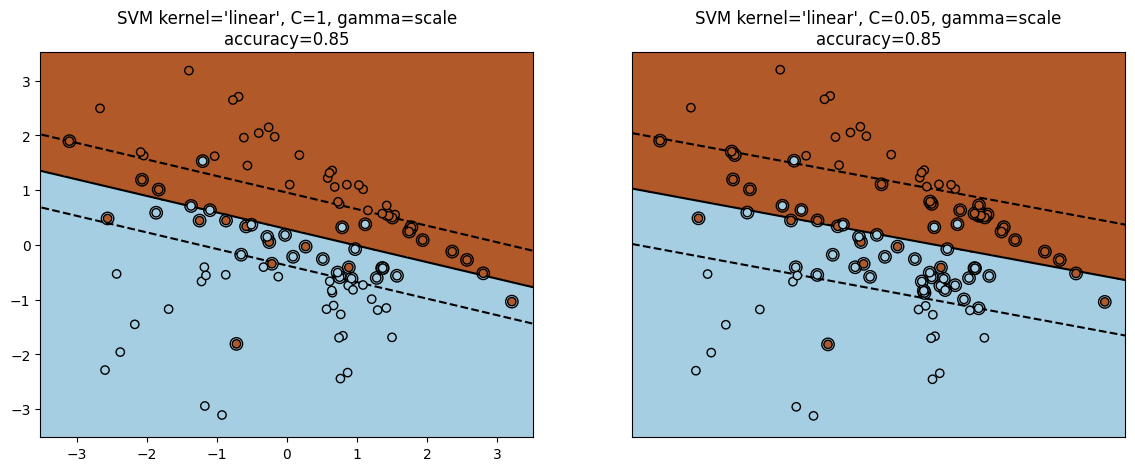

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Fit with C=1.
clf_C1 = SVC(kernel="linear", C=1)
clf_C1.fit(X, y)

# Fit with C=0.05
clf_C005 = SVC(kernel="linear", C=0.05)
clf_C005.fit(X, y)

# Plot decision boundaries.
plot_decision_regions(clf_C1, X, y, ax1)
plot_decision_regions(clf_C005, X, y, ax2)

A large value of `C` basically tells our model to only consider points close to line of separation.

A small value of `C` includes more observations, allowing the margins to be calculated using all the data in the area.

Feel free to try different values of `C`.

###SVM with polynomial kernel

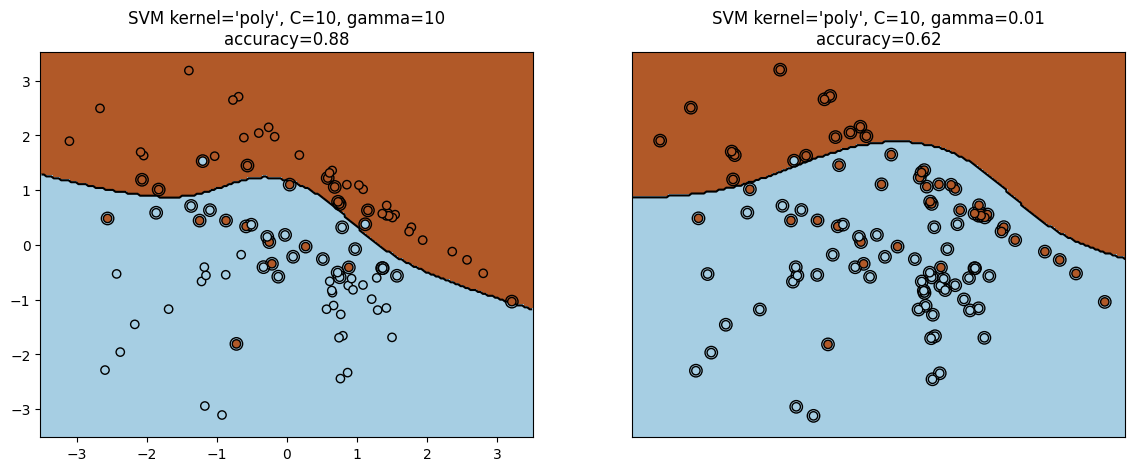

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Fit polynomial with C=10, gamma=10.
clf_g10 = SVC(kernel="poly", C=10, gamma=10)
clf_g10.fit(X, y)

# Fit gaussian with C=10, gamma=10.
clf_g001 = SVC(kernel="poly", C=10, gamma=0.01)
clf_g001.fit(X, y)

# Plot decision boundaries.
plot_decision_regions(clf_g10, X, y, ax1)
plot_decision_regions(clf_g001, X, y, ax2)

### SVM with gaussian kernel

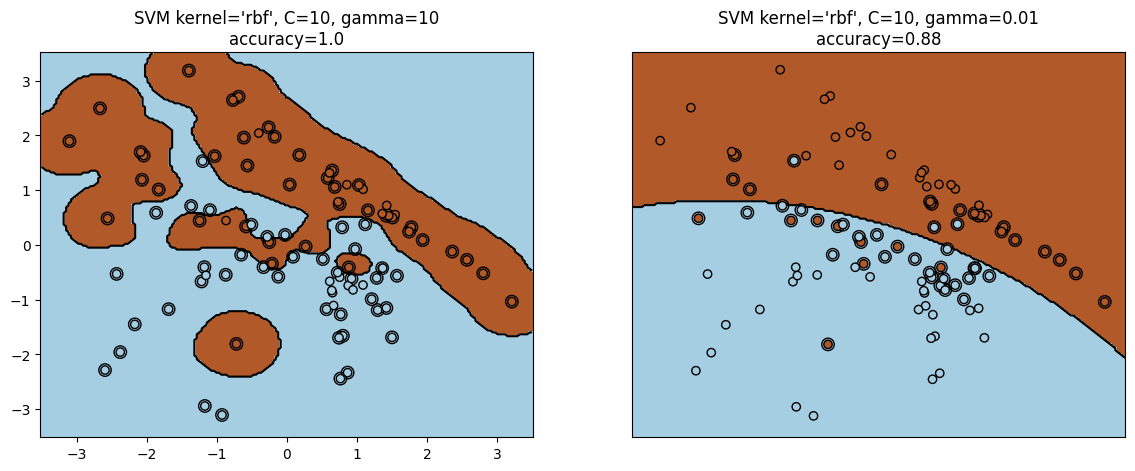

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Fit gaussian with C=10, gamma=10.
clf_g10 = SVC(kernel="rbf", C=10, gamma=10)
clf_g10.fit(X, y)

# Fit gaussian with C=10, gamma=10.
clf_g001 = SVC(kernel="rbf", C=10, gamma=0.01)
clf_g001.fit(X, y)

# Plot decision boundaries.
plot_decision_regions(clf_g10, X, y, ax1)
plot_decision_regions(clf_g001, X, y, ax2)

##Part2: Spam Dataset

## Data loading
Data available in [UCI Machine Learning repository](https://archive.ics.uci.edu/ml/datasets/Spambase). It contains 4601 observations of 58 different variables corresponding to no-spam/spam e-mails.

The CSV file has no header, the variable names are available [here](https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.names) along with a description of each one.

In [ ]:
!curl -s https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.names | head -n26

| SPAM E-MAIL DATABASE ATTRIBUTES (in .names format)
|
| 48 continuous real [0,100] attributes of type word_freq_WORD 
| = percentage of words in the e-mail that match WORD,
| i.e. 100 * (number of times the WORD appears in the e-mail) / 
| total number of words in e-mail.  A "word" in this case is any 
| string of alphanumeric characters bounded by non-alphanumeric 
| characters or end-of-string.
|
| 6 continuous real [0,100] attributes of type char_freq_CHAR
| = percentage of characters in the e-mail that match CHAR,
| i.e. 100 * (number of CHAR occurences) / total characters in e-mail
|
| 1 continuous real [1,...] attribute of type capital_run_length_average
| = average length of uninterrupted sequences of capital letters
|
| 1 continuous integer [1,...] attribute of type capital_run_length_longest
| = length of longest uninterrupted sequence of capital letters
|
| 1 continuous integer [1,...] attribute of type capital_run_length_total
| = sum of length of uninterrupted sequences of

In [ ]:
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data", header=None)

The last column indicates whether the observation is spam (1) or not (0).

In [ ]:
X = data.iloc[:, :-1].to_numpy()
y = data.iloc[:,-1].to_numpy()

We split the dataset into training (80%) and test (20%) sets, using stratified splitting, that is, keeping the class proportion in each set. We set random_state to an int number for reproducible output across multiple function calls.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1, stratify=y)

## Training a linear SVM classifier

Again, we will be using a [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) object to chain multiple estimators into one. In particular, we will first [standardize](https://en.wikipedia.org/wiki/Feature_scaling#Standardization_(Z-score_Normalization)) our data, as it usually helps linear classifiers, and then apply the svm classifier.

In [ ]:
model1 = Pipeline([
    ('center', StandardScaler()),
    ('clf', SVC(C=1, kernel="linear"))
])

In [ ]:
model1.fit(X_train, y_train)

Pipeline(steps=[('center', StandardScaler()),
                ('clf', SVC(C=1, kernel='linear'))])

In [ ]:
pred_train = model1.predict(X_train)
pred_test = model1.predict(X_test)

In [ ]:
print("TRAINING\n" + classification_report(y_train, pred_train))
print("\nTESTING\n" + classification_report(y_test, pred_test))

TRAINING
              precision    recall  f1-score   support

           0       0.81      0.88      0.84        40
           1       0.86      0.80      0.83        40

    accuracy                           0.84        80
   macro avg       0.84      0.84      0.84        80
weighted avg       0.84      0.84      0.84        80


TESTING
              precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.77      1.00      0.87        10

    accuracy                           0.85        20
   macro avg       0.88      0.85      0.85        20
weighted avg       0.88      0.85      0.85        20



In [ ]:
train_error = 1. - accuracy_score(y_train, pred_train)
train_cmat = confusion_matrix(y_train, pred_train)
test_error = 1. - accuracy_score(y_test, pred_test)
test_cmat = confusion_matrix(y_test, pred_test)

print('train error: %f ' % train_error)
print('train confusion matrix:')
print(train_cmat)
print('test error: %f ' % test_error)
print('test confusion matrix:')
print(test_cmat)

train error: 0.162500 
train confusion matrix:
[[35  5]
 [ 8 32]]
test error: 0.150000 
test confusion matrix:
[[ 7  3]
 [ 0 10]]


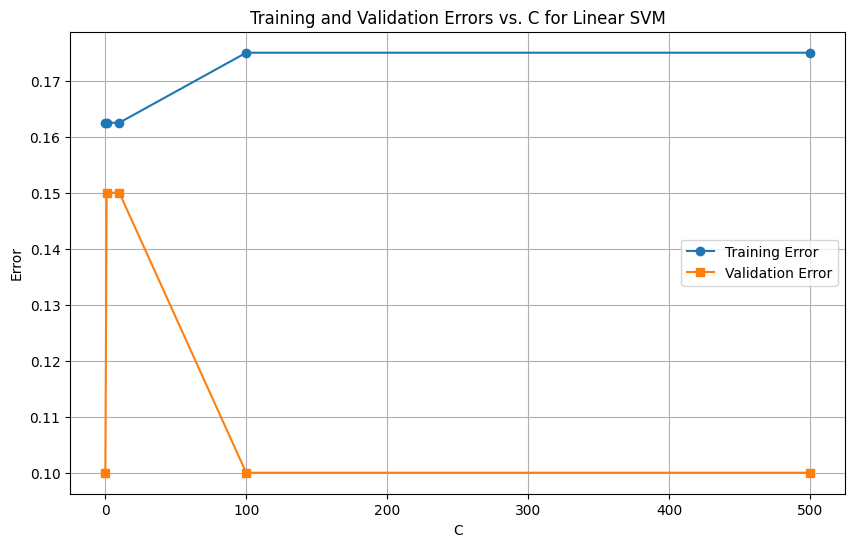

In [ ]:
C_values = [0.1, 1, 10, 100, 500]
train_errors = []
validation_errors = []
for C in C_values:
    model = Pipeline([
        ('center', StandardScaler()),
        ('clf', SVC(C=C, kernel="linear"))
    ])
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    train_error = 1 - accuracy_score(y_train, train_pred)
    train_errors.append(train_error)
    val_pred = model.predict(X_test)
    val_error = 1 - accuracy_score(y_test, val_pred)
    validation_errors.append(val_error)


plt.figure(figsize=(10, 6))
plt.plot(C_values, train_errors, marker='o', label='Training Error')
plt.plot(C_values, validation_errors, marker='s', label='Validation Error')
plt.title("Training and Validation Errors vs. C for Linear SVM")
plt.xlabel("C")
plt.ylabel("Error")
plt.legend()
plt.grid(True)
plt.show()


## Training a non-linear SVM classifier

Now, we train in model2 a non-linear SVM, using a Gaussian kernel. We first set a fix value for the hyperparameters `C` and `gamma`. Later we will try to optimize these hyperparameters.

In [ ]:
model2 = Pipeline([
    ('center', StandardScaler()),
    ('clf', SVC(C=0.1, kernel="rbf", gamma=1))
])

In [ ]:
model2.fit(X_train, y_train)

Pipeline(steps=[('center', StandardScaler()), ('clf', SVC(C=0.1, gamma=1))])

In [ ]:
pred_train = model2.predict(X_train)
pred_test = model2.predict(X_test)

In [ ]:
print("TRAINING\n" + classification_report(y_train, pred_train))
print("\nTESTING\n" + classification_report(y_test, pred_test))

TRAINING
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        40
           1       0.88      0.88      0.88        40

    accuracy                           0.88        80
   macro avg       0.88      0.88      0.88        80
weighted avg       0.88      0.88      0.88        80


TESTING
              precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.83      1.00      0.91        10

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.90        20
weighted avg       0.92      0.90      0.90        20



In [ ]:
train_error = 1. - accuracy_score(y_train, pred_train)
train_cmat = confusion_matrix(y_train, pred_train)
test_error = 1. - accuracy_score(y_test, pred_test)
test_cmat = confusion_matrix(y_test, pred_test)

print('train error: %f ' % train_error)
print('train confusion matrix:')
print(train_cmat)
print('test error: %f ' % test_error)
print('test confusion matrix:')
print(test_cmat)

train error: 0.125000 
train confusion matrix:
[[35  5]
 [ 5 35]]
test error: 0.100000 
test confusion matrix:
[[ 8  2]
 [ 0 10]]


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

Cs = [1, 10, 100, 200]
gammas = [1e-4, 1e-3, 1e-2, 1e-1]
results = []

for C in Cs:
    for gamma in gammas:
        model = Pipeline([
            ('center', StandardScaler()),
            ('clf', SVC(C=C, kernel="rbf", gamma=gamma))
        ])

        model.fit(X_train, y_train)
        pred_train = model.predict(X_train)
        pred_test = model.predict(X_test)

        train_error = 1. - accuracy_score(y_train, pred_train)
        test_error = 1. - accuracy_score(y_test, pred_test)

        results.append({
            'C': C,
            'gamma': gamma,
            'train_error': train_error,
            'test_error': test_error
        })
print("Summary of Training and Testing Errors:")
for res in results:
    print(f"C = {res['C']}, gamma = {res['gamma']:.4e}: Train Error = {res['train_error']:.4f}, Test Error = {res['test_error']:.4f}")


Summary of Training and Testing Errors:
C = 1, gamma = 1.0000e-04: Train Error = 0.1500, Test Error = 0.2000
C = 1, gamma = 1.0000e-03: Train Error = 0.1500, Test Error = 0.2000
C = 1, gamma = 1.0000e-02: Train Error = 0.1375, Test Error = 0.1500
C = 1, gamma = 1.0000e-01: Train Error = 0.1500, Test Error = 0.1000
C = 10, gamma = 1.0000e-04: Train Error = 0.1500, Test Error = 0.2000
C = 10, gamma = 1.0000e-03: Train Error = 0.1375, Test Error = 0.1500
C = 10, gamma = 1.0000e-02: Train Error = 0.1625, Test Error = 0.1500
C = 10, gamma = 1.0000e-01: Train Error = 0.1375, Test Error = 0.1000
C = 100, gamma = 1.0000e-04: Train Error = 0.1375, Test Error = 0.1500
C = 100, gamma = 1.0000e-03: Train Error = 0.1625, Test Error = 0.1500
C = 100, gamma = 1.0000e-02: Train Error = 0.1500, Test Error = 0.1000
C = 100, gamma = 1.0000e-01: Train Error = 0.1375, Test Error = 0.1000
C = 200, gamma = 1.0000e-04: Train Error = 0.1750, Test Error = 0.1500
C = 200, gamma = 1.0000e-03: Train Error = 0.1625

## Linear SVM hyper-parameter search
Like in the previous lab, you can use a `GridSearchCV` object to do an exhaustive search over the `C` parameter, or you can try the [RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html#sklearn.model_selection.RandomizedSearchCV) class to sample from a distribution over possible parameter values (see [this guide](https://scikit-learn.org/stable/modules/grid_search.html#randomized-parameter-optimization)).

Training this model for each hyper-parameter value can take quite some time, especially when doing cross-validation. As the dataset is big enough, you can avoid doing cross-validation by passing a `ShuffleSplit` (e.g., `ShuffleSplit(n_splits=1, train_size=0.75)`) or `StratifiedShuffleSplit` (for stratified splitting) as the `cv` parameter in the `GridSearchCV` constructor.

Note that we use `f1` as scoring metric instead of the default `accuracy` score.

In [ ]:
Cs = [0.1, 1, 10, 100, 200]

In [ ]:
grid_search1 = GridSearchCV(model1,
                           param_grid={"clf__C": Cs},
                           cv=StratifiedShuffleSplit(n_splits=1, train_size=0.75,random_state=2),
                           return_train_score=True, scoring='f1')
grid_search1.fit(X_train, y_train)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=1, random_state=2, test_size=None,
            train_size=0.75),
             estimator=Pipeline(steps=[('center', StandardScaler()),
                                       ('clf', SVC(C=0.1, kernel='linear'))]),
             param_grid={'clf__C': [0.1, 1, 10, 100, 200]},
             return_train_score=True, scoring='f1')

Calling `predict` on a fitted GridSearchCV object will make predictions using **the best set of hyper-parameters**.

In [ ]:
pred_train = grid_search1.predict(X_train)
pred_test = grid_search1.predict(X_test)

###Add the code to
1. print the classification report for the train and the test sets
2. print the error and confusion matrices for the train and test sets
3. show in the same figure two plots with the mean train and mean validation scores for each value of the hyperparameter C (results in `grid_search1.cv_results`, see the [user guide](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) )
4. show the best hyperparameter (use `grid_search1.best_params_`)


TRAINING
              precision    recall  f1-score   support

           0       0.80      0.90      0.85        40
           1       0.89      0.78      0.83        40

    accuracy                           0.84        80
   macro avg       0.84      0.84      0.84        80
weighted avg       0.84      0.84      0.84        80


TESTING
              precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.83      1.00      0.91        10

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.90        20
weighted avg       0.92      0.90      0.90        20

train error: 0.162500 
train confusion matrix:
[[36  4]
 [ 9 31]]
test error: 0.100000 
test confusion matrix:
[[ 8  2]
 [ 0 10]]


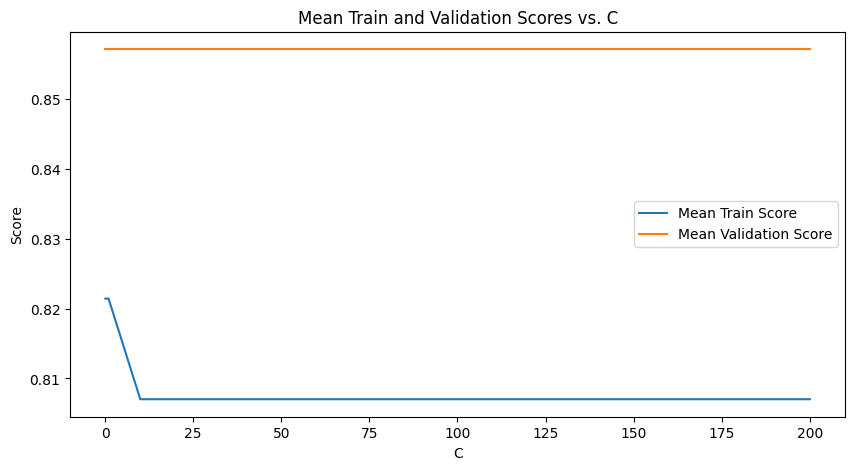

Best hyperparameter: {'clf__C': 0.1}


In [ ]:
## your code here
# Print classification reports
print("TRAINING\n" + classification_report(y_train, pred_train))
print("\nTESTING\n" + classification_report(y_test, pred_test))

# Print error and confusion matrices
train_error = 1. - accuracy_score(y_train, pred_train)
train_cmat = confusion_matrix(y_train, pred_train)
test_error = 1. - accuracy_score(y_test, pred_test)
test_cmat = confusion_matrix(y_test, pred_test)

print('train error: %f ' % train_error)
print('train confusion matrix:')
print(train_cmat)
print('test error: %f ' % test_error)
print('test confusion matrix:')
print(test_cmat)

# Plot mean train and validation scores
plt.figure(figsize=(10, 5))
plt.plot(Cs, grid_search1.cv_results_['mean_train_score'], label='Mean Train Score')
plt.plot(Cs, grid_search1.cv_results_['mean_test_score'], label='Mean Validation Score')
plt.xlabel('C')
plt.ylabel('Score')
plt.title('Mean Train and Validation Scores vs. C')
plt.legend()
plt.show()

print("Best hyperparameter:", grid_search1.best_params_)

## Non-linear SVM hyper-parameter search
Now you will optimize the parameters C and h for the Gaussian SVM

In [ ]:
Cs = [1, 10, 100, 200]
gammas = [1e-4, 1e-3, 1e-2, 1e-1]

###Add the code to
1. perform a GridSearchCV (**use the non linear model 'model2'**, and `param_grid={"clf__C": Cs, "clf__gamma": gammas}`)
2. make predictions on the best pair of hyperparameters
3. print the classification report for the train and the test sets (for the best hyperparameters)
4. print the error and confusion matrices for the train and test sets (for the best hyperparameters)
5. show the best hyperparameter (use `grid_search.best_params_`)

Q4: Plot the training and validation scores (two 3D plots). Find the optimal values of C and h


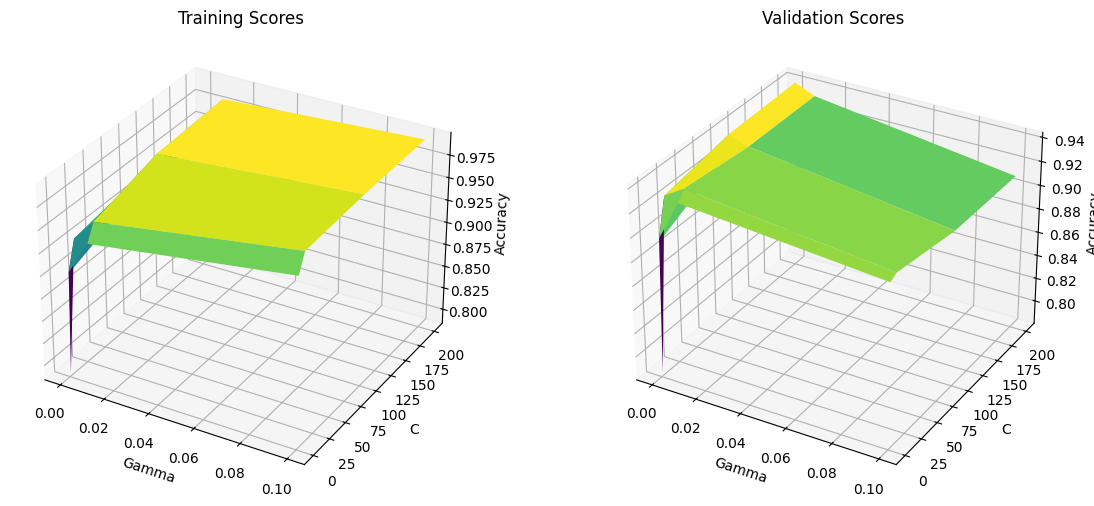

Best parameters: {'clf__C': 200, 'clf__gamma': 0.001}
Best validation accuracy: 0.9408695652173913


In [ ]:
# GridSearchCV for Gaussian SVM (model2)
param_grid = {"clf__C": Cs, "clf__gamma": gammas}
grid_search2 = GridSearchCV(model2, param_grid=param_grid,
    cv=StratifiedShuffleSplit(n_splits=5, train_size=0.75, random_state=42),
    return_train_score=True,
    scoring="accuracy" )

grid_search2.fit(X_train, y_train)

# training and validation scores
train_scores = grid_search2.cv_results_["mean_train_score"]
validation_scores = grid_search2.cv_results_["mean_test_score"]

# Plot 3D
train_scores_reshaped = train_scores.reshape(len(Cs), len(gammas))
validation_scores_reshaped = validation_scores.reshape(len(Cs), len(gammas))

# Plot 3D
fig = plt.figure(figsize=(14, 6))

# Training scores
ax1 = fig.add_subplot(121, projection="3d")
X, Y = np.meshgrid(gammas, Cs)
ax1.plot_surface(X, Y, train_scores_reshaped, cmap="viridis")
ax1.set_title("Training Scores")
ax1.set_xlabel("Gamma")
ax1.set_ylabel("C")
ax1.set_zlabel("Accuracy")

# Validation scores
ax2 = fig.add_subplot(122, projection="3d")
ax2.plot_surface(X, Y, validation_scores_reshaped, cmap="viridis")
ax2.set_title("Validation Scores")
ax2.set_xlabel("Gamma")
ax2.set_ylabel("C")
ax2.set_zlabel("Accuracy")

plt.show()

print("Best parameters:", grid_search2.best_params_)
print("Best validation accuracy:", grid_search2.best_score_)



Q5 For the best classifier found in the previous step, compute classification error on the test set

In [ ]:
#Use the best validation
best_model = grid_search2.best_estimator_

y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

# Print classification reports
print("Training Data Classification Report:\n", classification_report(y_train, y_pred_train))
print("Test Data Classification Report:\n", classification_report(y_test, y_pred_test))

# Calculate errors
train_error = 1 - accuracy_score(y_train, y_pred_train)
test_error = 1 - accuracy_score(y_test, y_pred_test)

print(f"Training Error: {train_error:.4f}")
print(f"Test Error: {test_error:.4f}")

# Calculate and print confusion matrices
conf_matrix_train = confusion_matrix(y_train, y_pred_train)
conf_matrix_test = confusion_matrix(y_test, y_pred_test)

print("Confusion Matrix (Training Data):\n", conf_matrix_train)
print("Confusion Matrix (Test Data):\n", conf_matrix_test)

Training Data Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96      2230
           1       0.95      0.92      0.94      1450

    accuracy                           0.95      3680
   macro avg       0.95      0.95      0.95      3680
weighted avg       0.95      0.95      0.95      3680

Test Data Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.95       558
           1       0.94      0.92      0.93       363

    accuracy                           0.94       921
   macro avg       0.94      0.94      0.94       921
weighted avg       0.94      0.94      0.94       921

Training Error: 0.0503
Test Error: 0.0554
Confusion Matrix (Training Data):
 [[2157   73]
 [ 112 1338]]
Confusion Matrix (Test Data):
 [[537  21]
 [ 30 333]]


After training and validating the hyperparameters, plot a meshgrid with the mean train and validation scores for all pairs of hyperparameters. Use this code:

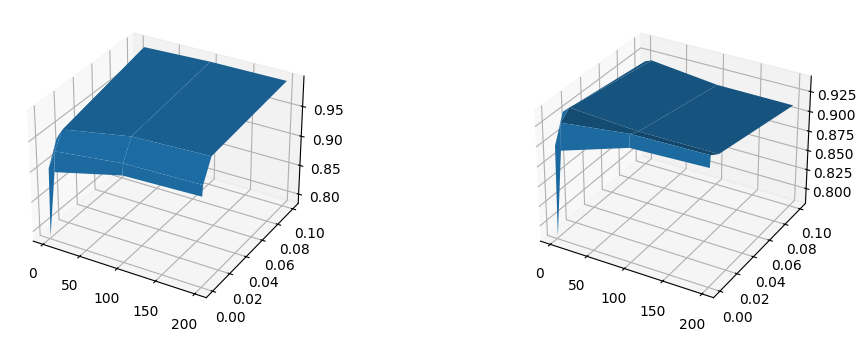

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 4))

X, Y = (np.meshgrid(Cs, gammas))

ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(X, Y, np.transpose(grid_search2.cv_results_["mean_train_score"].reshape((4, 4))))
ax = fig.add_subplot(122, projection='3d')
ax.plot_surface(X, Y, np.transpose(grid_search2.cv_results_["mean_test_score"].reshape((4, 4))))

You can also show the parameters and scores as a pandas DataFrame:

In [ ]:
pd.concat([pd.DataFrame(grid_search2.cv_results_["params"]),pd.DataFrame(grid_search2.cv_results_["mean_test_score"], columns=["F1"])],axis=1)


,clf__C,clf__gamma,F1
0,1,0.0001,0.783478
1,1,0.0010,0.897826
2,1,0.0100,0.931304
3,1,0.1000,0.917174
4,10,0.0001,0.895000
5,10,0.0010,0.928478
6,10,0.0100,0.938696
7,10,0.1000,0.920435
8,100,0.0001,0.923043
9,100,0.0010,0.938913


From the previous cases, the best c=200 and best gamma=0.001, which gives the best F1 score of 0.9408.

 So, for the next parts, we choose these parameters for our SVM model.





Q6: Compute the confusion matrix for the test set. Compute the six metrics (error, accuracy, precision,
recall, specificity and f-score).

In [ ]:
svm_model = SVC(C=200, kernel='rbf', gamma=0.001)
svm_model.fit(X_train, y_train)

#predictions
y_pred = svm_model.predict(X_test)

#confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

#calculation
error = (fp + fn) / len(y_test)  # Error rate
accuracy = accuracy_score(y_test, y_pred)  # Accuracy
precision = precision_score(y_test, y_pred)  # Precision
recall = recall_score(y_test, y_pred)  # Recall (Sensitivity)
specificity = tn / (tn + fp)  # Specificity
f_score = f1_score(y_test, y_pred)  # F-Score

# Display results
print(f"Confusion Matrix:\n[[{tn} {fp}]\n [{fn} {tp}]]")
print(f"Error Rate: {error:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall (Sensitivity): {recall:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"F-Score: {f_score:.4f}")

Confusion Matrix:
[[513 45]
 [46 317]]
Error Rate: 0.0988
Accuracy: 0.9012
Precision: 0.8757
Recall (Sensitivity): 0.8733
Specificity: 0.9194
F-Score: 0.8745


Q7: Explain why precision, recall, specificity and f-score are more appropriate than accuracy and error for
evaluating the classifier performance.

**Answer:**
Accuracy and error are simple metrics that show how many predictions were correct or incorrect. However, they can be misleading, especially when the dataset is imbalanced (one class has far more samples than the other). For example, if 90% of emails are NOT SPAM, a model that always predicts "NOT SPAM" will have high accuracy but will fail to detect SPAM emails.

In contrast:
- Precision: Focuses on how many of the predicted SPAM emails are actually SPAM. This is important when the cost of false positives (e.g., wrongly marking important emails as SPAM) is high.

- Recall (Sensitivity): Measures how many of the actual SPAM emails were correctly identified. This is crucial when we don’t want to miss any SPAM emails.

- Specificity: Looks at how well the model correctly identifies non-SPAM emails. This ensures regular emails are not wrongly flagged as SPAM.

- F-Score: Balances precision and recall. It’s useful when both false positives and false negatives matter.


These metrics give a deeper understanding of the classifier's performance, especially when class distributions are uneven or the cost of errors is different for each class.